In [45]:
import numpy as np
from numpy import random, random_intel
import psutil
import os
from time import time
import timeit
import os

pid = os.getpid()
python_process = psutil.Process(pid)

cpu2 = psutil.cpu_percent(interval=None)


start_time2_a = time()
np.random_intel.rand(10**5)
start_time2_b = time()

cpu3 = psutil.cpu_percent(interval=None)

memoryUse = python_process.memory_info()[0]/2.**30

print(python_process)
print("The CPU 1 usage is : ", cpu2)
print("The CPU 2 usage is : ", cpu3, float(start_time2_b - start_time2_a))
print('memory use:', memoryUse)

psutil.Process(pid=18528, name='python.exe', status='running', started='15:52:00')
The CPU 1 usage is :  3.4
The CPU 2 usage is :  0.0 0.0009865760803222656
memory use: 0.9740371704101562


In [44]:
import numpy as np
from numpy import random, random_intel
import psutil
import os
from time import time
import timeit
import os

pid = os.getpid()
python_process = psutil.Process(pid)

cpu2 = psutil.cpu_percent(interval=None)


start_time2_a = time()
np.random.rand(10**5)
start_time2_b = time()

cpu3 = psutil.cpu_percent(interval=None)

memoryUse = python_process.memory_info()[0]/2.**30

print(python_process)
print("The CPU 1 usage is : ", cpu2)
print("The CPU 2 usage is : ", cpu3, float(start_time2_b - start_time2_a))
print('memory use:', memoryUse)

psutil.Process(pid=18528, name='python.exe', status='running', started='15:52:00')
The CPU 1 usage is :  3.8
The CPU 2 usage is :  0.0 0.001004934310913086
memory use: 0.9740066528320312


In [11]:
%time np.random.rand(10**5)

CPU times: total: 0 ns
Wall time: 1.02 ms


array([0.45626518, 0.40707762, 0.20963306, ..., 0.75964116, 0.75792924,
       0.02108528])

In [17]:
%time np.random_intel.rand(10**5)

CPU times: total: 0 ns
Wall time: 1.35 ms


array([0.61988591, 0.41267504, 0.2367602 , ..., 0.44837288, 0.55064377,
       0.74932797])

In [19]:
%timeit np.random.rand(10**5)

480 µs ± 4.66 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [18]:
%timeit np.random_intel.rand(10**5)

65.6 µs ± 1.61 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [15]:
cpu2 = psutil.cpu_percent(interval=None)
np.random.rand(10**5)
cpu3 = psutil.cpu_percent(interval=None)
print("The CPU 1 usage is : ", cpu2)
print("The CPU 2 usage is : ", cpu3)

The CPU 1 usage is :  2.8
The CPU 2 usage is :  0.0


In [16]:
cpu2 = psutil.cpu_percent(interval=None)
np.random_intel.rand(10**5)
cpu3 = psutil.cpu_percent(interval=None)
print("The CPU 1 usage is : ", cpu2)
print("The CPU 2 usage is : ", cpu3)

The CPU 1 usage is :  2.0
The CPU 2 usage is :  0.0


In [20]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from time import time
from sklearn.metrics import mean_squared_error
from math import sqrt
import numpy as np

df = pd.read_csv("df_allData.csv")

keep_columns = ['Close', 'RSI', '50_SMA','20_SMA']
df = df.dropna()
X = df[keep_columns].values
Y = df['Target'].values

In [23]:
pid = os.getpid()
python_process = psutil.Process(pid)

cpu1 = psutil.cpu_percent(interval=None)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
cpu2 = psutil.cpu_percent(interval = None)

memoryUse = python_process.memory_info()[0]/2.**30

print('memory use:', memoryUse)
print('cpu P1 use:', cpu1)
print('cpu P2 use:', cpu2)

memory use: 0.31095123291015625
cpu P1 use: 3.7
cpu P2 use: 13.5


In [27]:
from sklearnex import patch_sklearn
patch_sklearn()

pid = os.getpid()
python_process = psutil.Process(pid)

cpu1 = psutil.cpu_percent(interval=None)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
cpu2 = psutil.cpu_percent(interval = None)

memoryUse = python_process.memory_info()[0]/2.**30

print('memory use:', memoryUse)
print('cpu P1 use:', cpu1)
print('cpu P2 use:', cpu2)

memory use: 0.3267097473144531
cpu P1 use: 5.0
cpu P2 use: 17.2


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [24]:
start_time2_a = time()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
start_time2_b = time()
print("The time usage is : ", float(start_time2_b - start_time2_a))

The time usage is :  0.10503554344177246


In [28]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split

start_time2_a = time()
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)
start_time2_b = time()
print("The time usage is : ", float(start_time2_b - start_time2_a))

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


The time usage is :  0.28855443000793457


In [22]:
%timeit X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

97.1 ms ± 1.29 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [29]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split

%timeit X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


67.8 ms ± 2.64 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [31]:
%time X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

CPU times: total: 78.1 ms
Wall time: 79 ms


In [30]:
from sklearnex import patch_sklearn
patch_sklearn()
from sklearn.model_selection import train_test_split

%time X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

CPU times: total: 78.1 ms
Wall time: 76 ms


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from time import time
from sklearn.model_selection import train_test_split
import psutil

In [35]:
start_time = time() 
regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
total_time = float(time() - start_time)

print(regr.score(X_test, y_test))

print("Time:" ,total_time)

0.9740320335690127
Time: 16.036616802215576


In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearnex import patch_sklearn
patch_sklearn()

start_time = time() 
regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
total_time = float(time() - start_time)

print(regr.score(X_test, y_test))

print("Time:" ,total_time)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


0.9740134650516118
Time: 16.182441473007202


In [37]:
%time regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)

CPU times: total: 1min 34s
Wall time: 16.2 s


In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearnex import patch_sklearn
patch_sklearn()

%time regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


CPU times: total: 1min 33s
Wall time: 16.1 s


In [39]:
%timeit regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)

17.2 s ± 271 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [40]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearnex import patch_sklearn
patch_sklearn()

%timeit regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


17.9 s ± 1.31 s per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [41]:
pid = os.getpid()
python_process = psutil.Process(pid)

cpu1 = psutil.cpu_percent(interval=None)
regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
cpu2 = psutil.cpu_percent(interval = None)

memoryUse = python_process.memory_info()[0]/2.**30

print('memory use:', memoryUse)
print('cpu P1 use:', cpu1)
print('cpu P2 use:', cpu2)

memory use: 0.9941520690917969
cpu P1 use: 29.1
cpu P2 use: 53.2


In [42]:
from sklearnex import patch_sklearn
patch_sklearn()

pid = os.getpid()
python_process = psutil.Process(pid)

cpu1 = psutil.cpu_percent(interval=None)
regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
cpu2 = psutil.cpu_percent(interval = None)

memoryUse = python_process.memory_info()[0]/2.**30

print('memory use:', memoryUse)
print('cpu P1 use:', cpu1)
print('cpu P2 use:', cpu2)

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


memory use: 0.9739456176757812
cpu P1 use: 22.7
cpu P2 use: 55.1


In [3]:
# from sklearnex import patch_sklearn
# patch_sklearn()

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn import ensemble
from time import time
from sklearn.model_selection import train_test_split
import psutil



start_time = time() 

# X, Y = make_regression(n_samples=200, random_state=1)
# X_train, X_test, y_train, y_test = train_test_split(X, Y,random_state=1)
regr = ensemble.RandomForestRegressor(n_estimators=1000).fit(X_train, y_train)
total_time = float(time() - start_time)

print(regr.score(X_test, y_test))



print("Time:" ,total_time)
print(psutil.cpu_percent()) # for cpu usage
print(psutil.disk_usage('/')) # for disk usage

0.974030008311638
Time: 30.916324377059937
42.5
sdiskusage(total=267631796224, used=263193645056, free=4438151168, percent=98.3)


In [4]:
import numpy as np
from sklearn import ensemble

from time import time
import psutil
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, random_state=1)

# Set the parameters by cross-validation
tuned_parameters = {'n_estimators': [500, 700, 1000], 'max_depth': [None, 1, 2, 3], 'min_samples_split': [1, 2, 3]}

clf = GridSearchCV(ensemble.RandomForestRegressor(), tuned_parameters, cv=5, n_jobs=-1, verbose=1)
start_time = time() 
clf.fit(X_train, y_train)
total_time = float(time() - start_time)

print (clf.best_estimator_)
print("Time:" ,total_time)
print(psutil.cpu_percent()) # for cpu usage
print(psutil.disk_usage('/')) # for disk usage

Fitting 5 folds for each of 36 candidates, totalling 180 fits


C:\Users\HP WORLD ANAND\anaconda3\envs\intelai\lib\site-packages\sklearn\model_selection\_search.py:922: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.23979829 0.20223978 0.19850374
 0.21868517 0.2213637  0.2017929         nan        nan        nan
 0.1018928  0.0765755  0.09656682 0.07836572 0.08914987 0.07186988
        nan        nan        nan 0.1710651  0.16556068 0.17723793
 0.18472024 0.14815331 0.14990798        nan        nan        nan
 0.21073838 0.16479516 0.20940947 0.20460927 0.19462871 0.20352508]
  warnings.warn(


RandomForestRegressor(n_estimators=500)
Time: 10.658783674240112
40.1
sdiskusage(total=267631796224, used=263031209984, free=4600586240, percent=98.3)


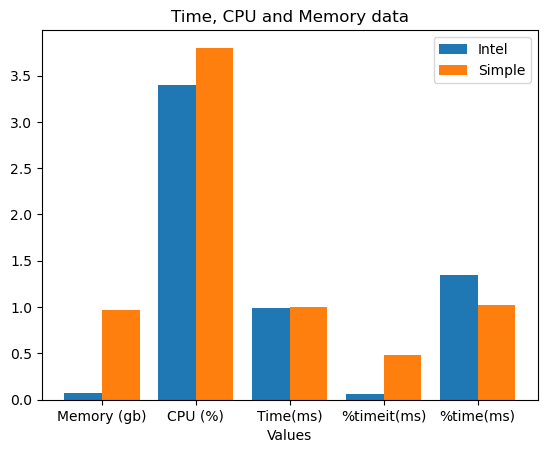

In [68]:
import matplotlib.pyplot as plt

random_df = {'Intel': [0.073951721,
                        3.4,
                        0.000986576,
                        65.6,
                        1.35
                       ],
            'Simple': [0.973983765,
                        3.8,
                        0.001004934,
                        480,
                        1.02,
                       ]}
  
X = ['Memory (gb)','CPU (%)','Time(ms)','%timeit(ms)','%time(ms)']

Intel=  [0.073951721, 3.4, 0.986576, 0.0656,1.35]

Simple = [0.973983765, 3.8, 1.004934,0.480,1.02]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Intel, 0.4, label = 'Intel')
plt.bar(X_axis + 0.2, Simple, 0.4, label = 'Simple')
  
plt.xticks(X_axis, X)
plt.xlabel("Values")
plt.title("Time, CPU and Memory data")
plt.legend()
plt.show()

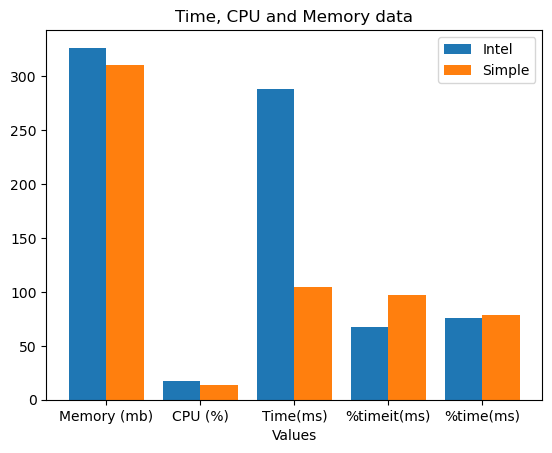

In [64]:
import numpy as np 
import matplotlib.pyplot as plt 
  
X = ['Memory (mb)','CPU (%)','Time(ms)','%timeit(ms)','%time(ms)']

Intel=  [326.709747,17.2,288.55443,67.8,76]

Simple = [310.951233,13.5,105.035543,97.1,79]

X_axis = np.arange(len(X))
  
plt.bar(X_axis - 0.2, Intel, 0.4, label = 'Intel')
plt.bar(X_axis + 0.2, Simple, 0.4, label = 'Simple')
  
plt.xticks(X_axis, X)
plt.xlabel("Values")
plt.title("Time, CPU and Memory data")
plt.legend()
plt.show()